# 1. SMA(Simple Moving Average)

- $d_{k} = {1 \over k} (p_1 + p_2 + ... + p_k) $

- $d_{k+1} = {1 \over k} (p_2 + p_3 + ... + p_{k+1}) $

- 주의할점: cheating
  - 미래에서 과거를 바라보는 시점으로 백테스트를 진행할 경우 현실과 괴리가 생길 수 있음을 생각하자

In [40]:
import pandas as pd
import numpy as np

from pandas import DataFrame

import FinanceDataReader as fdr

from initializer import init

init()
%matplotlib inline

df: DataFrame = fdr.DataReader("005930", "2014-01-02", "2020-10-30")
df = df[["Close"]]
df.columns = ["삼성전자"]
df.head(3)

,삼성전자
Date,
2014-01-02,26180
2014-01-03,25920
2014-01-06,26140


## 1.1. `rolling()`

In [41]:
df.rolling(window=5)        # 5일 단위로 집계할 준비
df.rolling(window=5).mean() # 5일 이동평균선

Rolling [window=5,center=False,axis=0,method=single]

,삼성전자
Date,
2014-01-02,NaN
2014-01-03,NaN
2014-01-06,NaN
2014-01-07,NaN
2014-01-08,26028.000
...,...
2020-10-26,60500.000
2020-10-27,60280.000
2020-10-28,59900.000


In [42]:
df.loc[:, "삼성전자_5_SMA"] = df["삼성전자"].rolling(window=5).mean()
df.head(10)

,삼성전자,삼성전자_5_SMA
Date,,
2014-01-02,26180,NaN
2014-01-03,25920,NaN
2014-01-06,26140,NaN
2014-01-07,26080,NaN
2014-01-08,25820,26028.000
2014-01-09,25500,25892.000
2014-01-10,25440,25796.000
2014-01-13,25900,25748.000
2014-01-14,26260,25784.000


### 1.1.1. `min_period` argument

`window=20`이면 처음 19개 데이터는 `NaN`이 되는데, `min_period`를 사용해서 `NaN` 값을 해결할 수 있다.
최소 `min_period` 개수 이상이면 `window` 보다 크기가 작아도 해당 값으로 operation을 진행한다.

즉 `min_periods=1`일 때, 1일은 1일 이평값, 2일은 2일 이평값, 3일은 3일 이평값, ..., 19일은 19일 이평값으로 할당하는 방법을 의미한다.

In [43]:
df["삼성전자"].rolling(window=20, min_periods=1).mean().head(10)

Date
2014-01-02   26180.000
2014-01-03   26050.000
2014-01-06   26080.000
2014-01-07   26080.000
2014-01-08   26028.000
2014-01-09   25940.000
2014-01-10   25868.571
2014-01-13   25872.500
2014-01-14   25915.556
2014-01-15   25922.000
Name: 삼성전자, dtype: float64

## 1.2. `expanding()`

- window를 1부터 시작해서 1씩 늘려가면서 rolling
  - 정확히는 `min_periods` 만큼 늘려간다.

In [44]:
df["삼성전자"].expanding(min_periods=1).mean().head(10)

Date
2014-01-02   26180.000
2014-01-03   26050.000
2014-01-06   26080.000
2014-01-07   26080.000
2014-01-08   26028.000
2014-01-09   25940.000
2014-01-10   25868.571
2014-01-13   25872.500
2014-01-14   25915.556
2014-01-15   25922.000
Name: 삼성전자, dtype: float64

In [45]:
"""rolling에 min_periods를 하고, SIZE 만큼 집계했을 때와 expanding 한 결과는 동일하다."""
SIZE = 10
a = df["삼성전자"].rolling(window=SIZE, min_periods=1).mean().head(SIZE)
b = df["삼성전자"].expanding(min_periods=1).mean().head(SIZE)

for x, y in zip(a, b):
    assert x == y

'rolling에 min_periods를 하고, SIZE 만큼 집계했을 때와 expanding 한 결과는 동일하다.'

In [46]:
df["삼성전자"].expanding(min_periods=2).mean().head()

Date
2014-01-02         NaN
2014-01-03   26050.000
2014-01-06   26080.000
2014-01-07   26080.000
2014-01-08   26028.000
Name: 삼성전자, dtype: float64

In [47]:
df.loc[:, "삼성전자_60_SMA_min_period"] = df["삼성전자"].rolling(window=60, min_periods=1).mean()
df.loc[:, "삼성전자_expanding"] = df["삼성전자"].expanding(min_periods=1).mean()
df

,삼성전자,삼성전자_5_SMA,삼성전자_60_SMA_min_period,삼성전자_expanding
Date,,,,
2014-01-02,26180,NaN,26180.000,26180.000
2014-01-03,25920,NaN,26050.000,26050.000
2014-01-06,26140,NaN,26080.000,26080.000
2014-01-07,26080,NaN,26080.000,26080.000
2014-01-08,25820,26028.000,26028.000,26028.000
...,...,...,...,...
2020-10-26,60400,60500.000,58288.333,38880.687
2020-10-27,59800,60280.000,58308.333,38893.176
2020-10-28,59000,59900.000,58308.333,38905.173


In [54]:
# import 대상이 현재 ipynb이므로 외부에서 처리할 수가 없는 안타까운 현실

# matplotlib korean setting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# matplotlib font config
# [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
plt.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

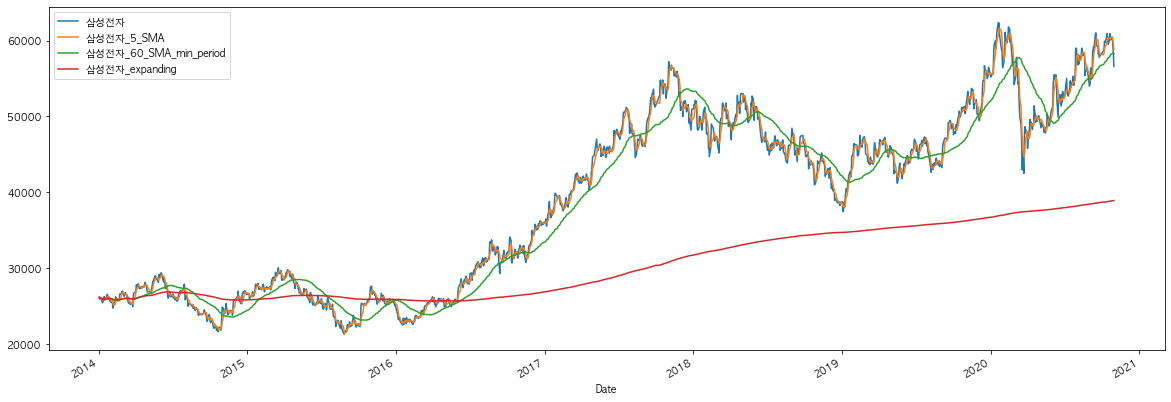

In [55]:
df.plot(figsize=(20, 7));

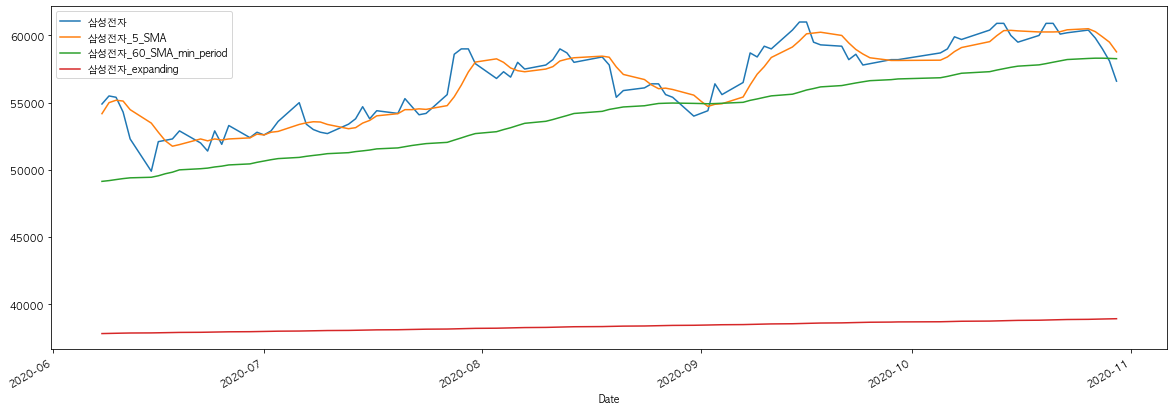

In [58]:
# 최근 100 거래일 기준
df.iloc[-100:].plot(figsize=(20, 7));

## 1.3. 볼린저 밴드(Bollinger Band)

> SMA를 응용한 지표

In [66]:
df: DataFrame = fdr.DataReader("005930", "2014-01-02", "2020-10-30")
df = df[["Close"]]
df.columns = ["삼성전자"]
df.head(10)

,삼성전자
Date,
2014-01-02,26180
2014-01-03,25920
2014-01-06,26140
2014-01-07,26080
2014-01-08,25820
2014-01-09,25500
2014-01-10,25440
2014-01-13,25900
2014-01-14,26260


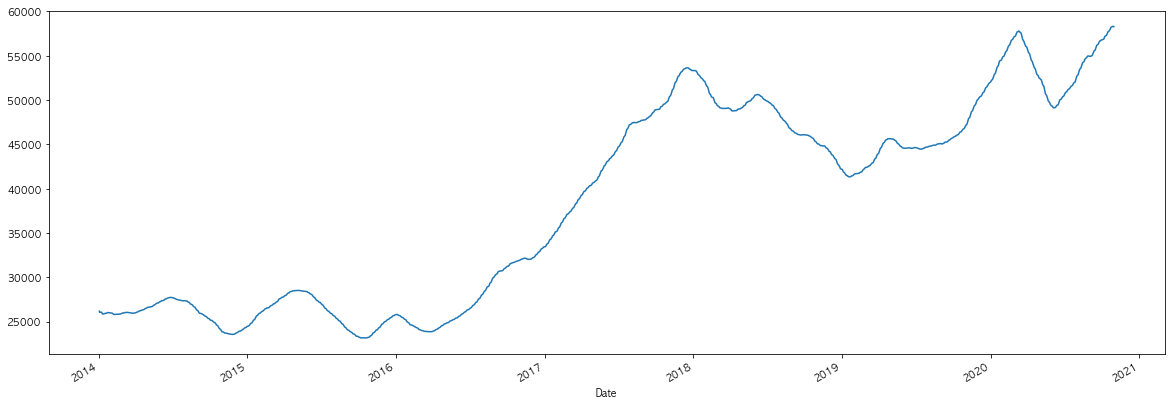

In [67]:
df.loc[:, "삼성전자_60_SMA_min_period"] = df["삼성전자"].rolling(window=60, min_periods=1).mean()
df["삼성전자_60_SMA_min_period"].plot(figsize=(20, 7));

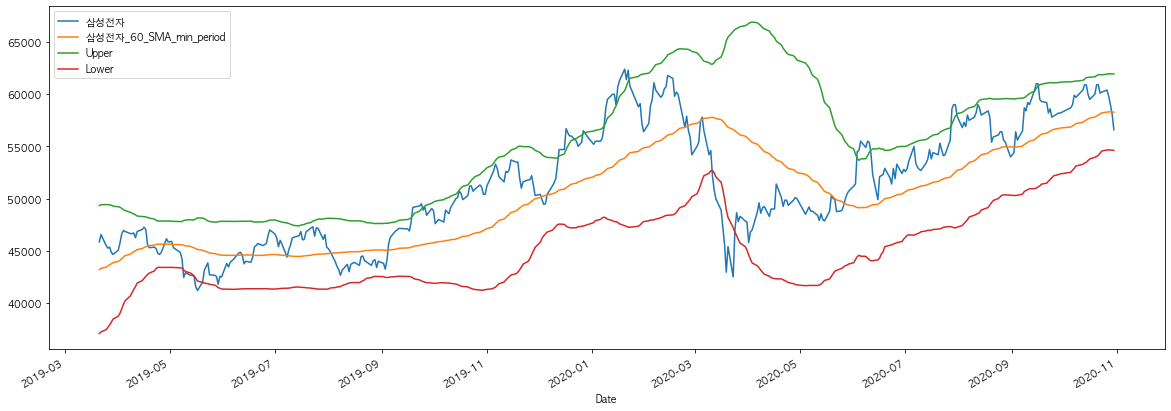

In [68]:
sma_60_std = df["삼성전자"].rolling(window=60).std()
df["Upper"] = df["삼성전자_60_SMA_min_period"] + 2 * sma_60_std
df["Lower"] = df["삼성전자_60_SMA_min_period"] - 2 * sma_60_std
df[["삼성전자", "삼성전자_60_SMA_min_period", "Upper", "Lower"]].iloc[-400:].plot(figsize=(20, 7));

## 1.4. Customizing rolling function

- Mean Absolute Deviation
- Mean Absolute Error (절대 평균 오차)

In [69]:
def mean_abs_dev(x):
    return np.abs(x - x.mean()).mean()

In [71]:
# Same with
# abs(df["삼성전자"][:5] = df["삼성전자"][:5].mean()).mean()
mean_abs_dev(df["삼성전자"].iloc[:5])

126.4

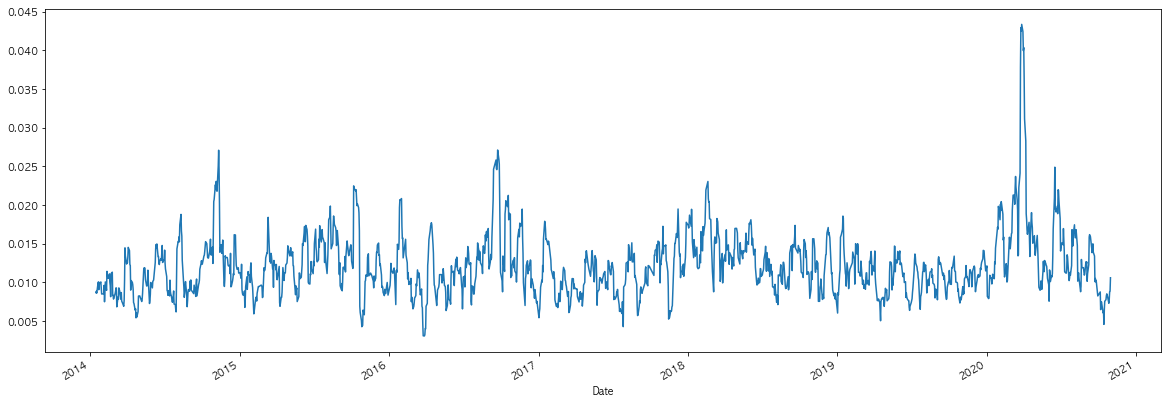

In [73]:
simple_rtn_df = df["삼성전자"].pct_change().fillna(0) # Log Return을 사용해도 된다.
simple_rtn_df.rolling(10).apply(mean_abs_dev).plot(figsize=(20, 7)); # apply에 lambda 식을 넘길 수 있다.

## 1.5. Rolling Correlation of Returns (상관계수)

In [101]:
df1 = fdr.DataReader("005930", "2018-01-02", "2020-10-30")
df2 = fdr.DataReader("148070", "2018-01-02", "2020-10-30")
df = pd.concat([df1["Close"], df2["Close"]], axis=1)
df.columns = ["삼성전자", "KOSEF 국고채10년"]

# df3 = fdr.DataReader("035420", "2018-01-02", "2020-10-30")
# df = pd.concat([df1["Close"], df2["Close"], df3["Close"]], axis=1)
# df.columns = ["삼성전자", "KOSEF 국고채10년", "네이버"]

In [102]:
daily_rtn_df: DataFrame = np.log(df.pct_change() + 1).fillna(0) # Simple Return을 사용해도 무방 - 실제로 차이가 있으나 큰 차이가 아님
daily_rtn_df.head()

,삼성전자,KOSEF 국고채10년
Date,,
2018-01-02,0.000,0.000
2018-01-03,0.012,-0.002
2018-01-04,-0.011,0.000
2018-01-05,0.020,-0.001
2018-01-08,-0.002,-0.001


In [103]:
daily_rtn_df.corr()

,삼성전자,KOSEF 국고채10년
삼성전자,1.000,-0.103
KOSEF 국고채10년,-0.103,1.000


In [104]:
total_corr_df = daily_rtn_df.rolling(window=250).corr().dropna()
total_corr_df

삼성전자  KOSEF 국고채10년
Date                                        
2019-01-09 삼성전자          1.000        -0.135
           KOSEF 국고채10년 -0.135         1.000
2019-01-10 삼성전자          1.000        -0.133
           KOSEF 국고채10년 -0.133         1.000
2019-01-11 삼성전자          1.000        -0.133
...                        ...           ...
2020-10-28 KOSEF 국고채10년 -0.044         1.000
2020-10-29 삼성전자          1.000        -0.042
           KOSEF 국고채10년 -0.042         1.000
2020-10-30 삼성전자          1.000        -0.035
           KOSEF 국고채10년 -0.035         1.000

[894 rows x 2 columns]

In [105]:
# unstack(level=1): index level=1을 column으로 옮기는 작업
unstacked_total_corr_df = total_corr_df.unstack(level=1)
unstacked_total_corr_df.head()

삼성전자       KOSEF 국고채10년       
           KOSEF 국고채10년  삼성전자 KOSEF 국고채10년   삼성전자
Date                                             
2019-01-09       -0.135 1.000        1.000 -0.135
2019-01-10       -0.133 1.000        1.000 -0.133
2019-01-11       -0.133 1.000        1.000 -0.133
2019-01-14       -0.134 1.000        1.000 -0.134
2019-01-15       -0.126 1.000        1.000 -0.126

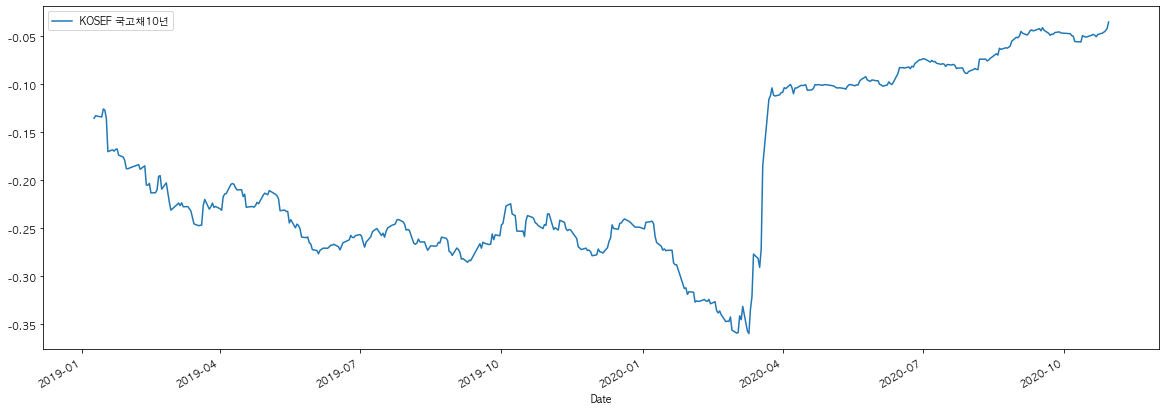

In [106]:
unstacked_total_corr_df["삼성전자"].drop("삼성전자", axis=1).plot(figsize=(20, 7));

In [107]:
corr_pair_df = daily_rtn_df["삼성전자"].rolling(window=60).corr(daily_rtn_df["KOSEF 국고채10년"])
corr_pair_df

Date
2018-01-02     NaN
2018-01-03     NaN
2018-01-04     NaN
2018-01-05     NaN
2018-01-08     NaN
              ... 
2020-10-26   0.055
2020-10-27   0.106
2020-10-28   0.100
2020-10-29   0.112
2020-10-30   0.131
Length: 696, dtype: float64

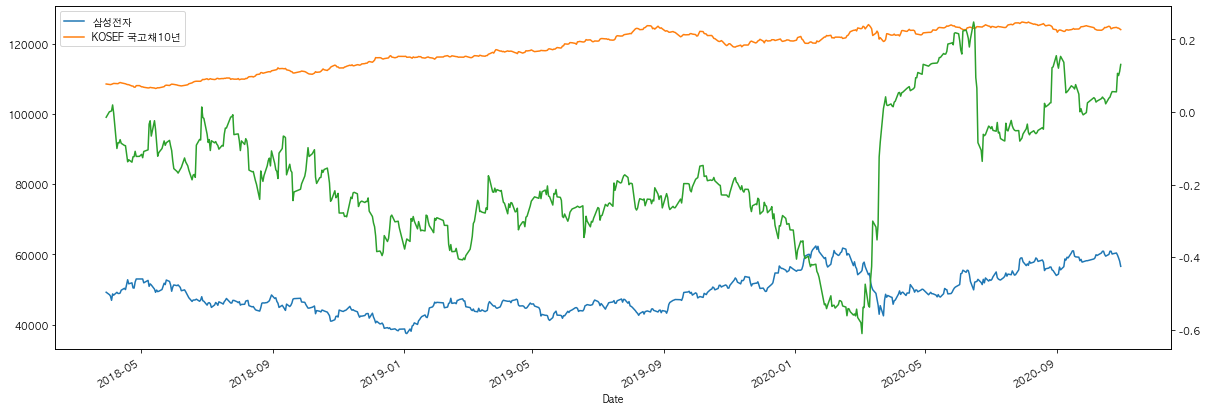

In [108]:
ax = df.iloc[60:].plot(figsize=(20, 7))
corr_pair_df[60:].plot(ax=ax, secondary_y=True);

# 2. EWMA, Exponentially-Weighted Moving Average

- SMA 단점
  - Smaller window size => signal 보다는 여전히 noise일 수 있음
  - lagging(min_periods로 어느 정도 커버할 수 있음)
  - window 내 가장 최근 데이터나 가장 과거 데이터나 가중치가 동일하게 평가됨
  - 극단적인 값(outlier)의 출현은 SMA를 왜곡할 수 있음
  - trend 정도만 보여줌
- **EWMA**: 최근 발생한 값들에 대해 더 가중치를 줌으로써 time에 대한 정보가 값에 반영됨

$$
\begin{aligned}
(0 \lt \alpha \le 1) &\text{ p: price, t: time}
\\\text{ }\\
EMA_t &= 1p_t + (1 - \alpha)p_{t - 1} + (1 - \alpha)^2p_{t - 2} + \dots + (1 - \alpha)^tp_o
\\\text{ }\\
\text{normalized } EMA_t &=
\frac{1p_t + (1 - \alpha)p_{t - 1} + (1 - \alpha)^2p_{t - 2} + \dots + (1 - \alpha)^tp_o}
{1 + (1 - \alpha) + (1 - \alpha)^2 + \dots + (1 - \alpha)^t}
\end{aligned}
$$

## 2.1. $\text{if } t \rightarrow \infty$

$$
\begin{aligned}
EMA_t &= \frac{1p_t + (1 - \alpha)p_{t - 1} + (1 - \alpha)^2p_{t - 2} + \dots}
{1 + (1 - \alpha) + (1 - \alpha)^2 + \dots} \\
\text{Since, } &1 + (1 - \alpha) + (1 - \alpha)^2 + \dots = \frac{1}{1 - (1 - \alpha)} = \frac{1}{\alpha}\\
EMA_t &= \alpha[1p_t + (1 - \alpha)p_{t - 1} + (1 - \alpha)^2p_{t - 2} + \dots] \\
EMA_t &= \alpha p_t + \alpha[(1 - \alpha)p_{t - 1} + (1 - \alpha)^2p_{t - 2} + \dots] \\
EMA_t &= \alpha p_t + (1 - \alpha)[\alpha p_{t - 1} + \alpha(1 - \alpha)p_{t - 2} + \dots] \\
EMA_t &= \alpha p_t + (1 - \alpha)[\alpha[p_{t - 1} + (1 - \alpha)p_{t - 2} + \dots]] \\
EMA_t &= \alpha p_t + (1 - \alpha)EMA_{t - 1} \\
\end{aligned}
\\\text{ }\\
\begin{aligned}
y_0 &= x_0 \\
y_1 &= (1 - \alpha)y_{t - 1} + \alpha x_1
\end{aligned}
$$

In [110]:
df = df[["삼성전자"]]
df.head()

,삼성전자
Date,
2018-01-02,51020
2018-01-03,51620
2018-01-04,51080
2018-01-05,52120
2018-01-08,52020


In [113]:
# adjust=False: ``t -> INF``을 가정하겠다.
df.ewm(alpha=0.8, adjust=False).mean().head()

,삼성전자
Date,
2018-01-02,51020.000
2018-01-03,51500.000
2018-01-04,51164.000
2018-01-05,51928.800
2018-01-08,52001.760


## 2.2. $\text{if }t \ne \infty$

$$
y_t = \frac
{x_t + (1 - \alpha)x_{t - 1} + (1 - \alpha)^2x_{t - 2} + \dots + (1 - \alpha)^tx_0}
{1 + (1 - \alpha) + (1 - \alpha)^2 + \dots + (1 - \alpha)^t}
$$

In [115]:
# adjust=True 적용
df.ewm(alpha=0.8, adjust=True).mean().head()

,삼성전자
Date,
2018-01-02,51020.000
2018-01-03,51520.000
2018-01-04,51165.161
2018-01-05,51930.256
2018-01-08,52002.074


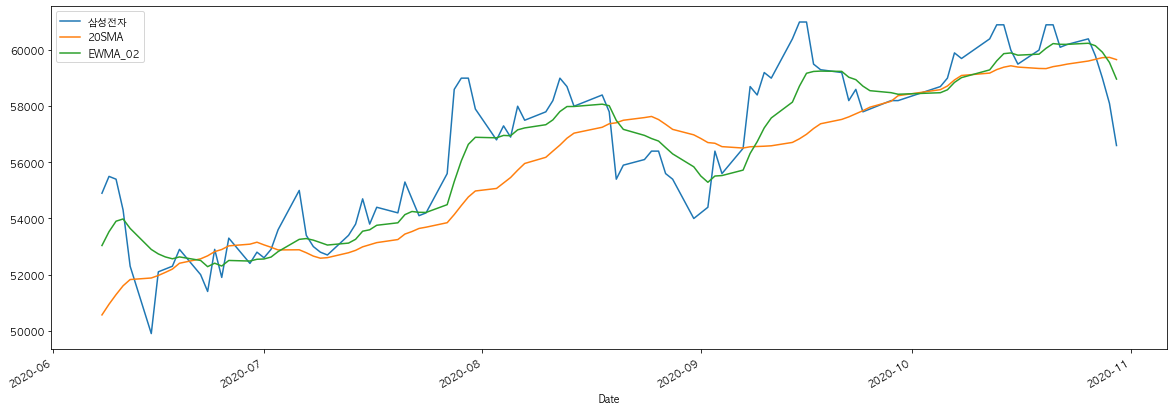

In [118]:
tmp_df = df[["삼성전자"]].copy()
tmp_df["20SMA"] = tmp_df["삼성전자"].rolling(20).mean()
tmp_df["EWMA_02"] = tmp_df["삼성전자"].ewm(alpha=0.2).mean()
tmp_df.iloc[-100:].plot(figsize=(20, 7));